In [301]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

## 5.80

In [302]:
# addapted from matplotlib docs 
# https://matplotlib.org/examples/api/two_scales.html

import numpy as np
import matplotlib.pyplot as plt

def mag_phase_plot(H_w, axis):

    mag = np.abs(H_w).astype('float32')
    phase = np.angle(H_w).astype('float32')
    
    fig, ax1 = plt.subplots()
    ax1.plot(axis, mag)
    ax1.set_xlabel('Frequency w')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Magnitude |H(w)|', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(axis, phase, 'r')
    ax2.set_ylabel('Phase <H(w)', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()

def time_plot(mag):

    fig, ax1 = plt.subplots()
    ax1.plot(mag)
    ax1.set_xlabel('Time (samples)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Magnitude |h(w)|', color='b')
    ax1.tick_params('y', colors='b')

    fig.tight_layout()
    plt.show()





## 5.80 a

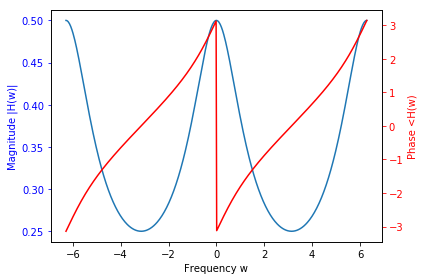

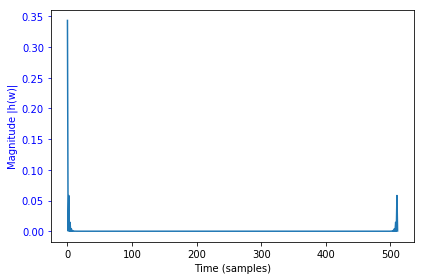

In [303]:
b0 = 1
a0 = 1
a1 = -3

worN = np.linspace(-2*np.pi, 2*np.pi, num=512)
w, h = sig.freqz(a=[a0,a1],b=[b0], worN=worN)

mag_phase_plot(h,w)

ht = ifft(np.abs(h))
time_plot(np.real(ht))

#### Explanation of impulse response

As the time domain response is convolved across an input signal it will create a delayed and attenuated copy of the signal. This would be heard as similar to actual reverberation. The repeated impulse appears to always appear at the end of the sample window. This means that the delay of the signal will always be the number of samples in the filter.

## 5.80 b

### Function to create all pass filters

In [304]:
def all_pass_generator(D_value, a_value, axis_len=512):
    
    '''
                jw                 -jw              -jwM
       jw    B(e  )    b[0] + b[1]e    + ... + b[M]e
    H(e  ) = ------ = -----------------------------------
                jw                 -jw              -jwN
             A(e  )    a[0] + a[1]e    + ... + a[N]e
         
    '''
    
    worN = np.linspace(-2*np.pi, 2*np.pi, num=axis_len)
    
    #numerator coeff array
    b = np.zeros(D_value+1)
    b[0] = -a_value
    b[D_value] = 1.
    
    # denominator coeff array
    a = np.zeros(D_value+1)
    a[0] = 1.
    a[D_value] = -a_value
    
    
    w, h = sig.freqz(a=a,b=b, worN=worN)
    
    return h, w

    

### Unit 1

#### Section 1:

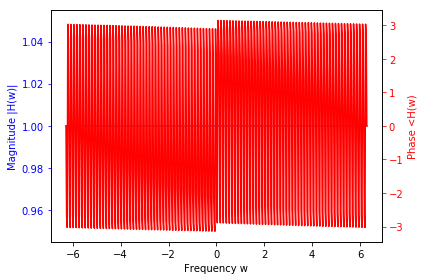

In [340]:
axis_samples = 500

h_u1_s1, w = all_pass_generator(50, 0.7, axis_samples)
mag_phase_plot(h_u1_s1, w)

#### Section 2:

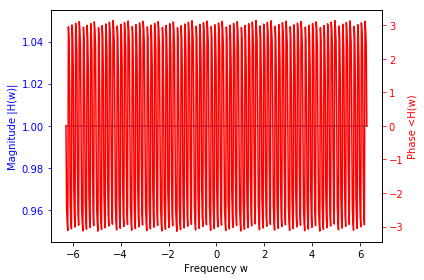

In [341]:
h_u1_s2, w = all_pass_generator(40, 0.665, axis_samples)
mag_phase_plot(h_u1_s2, w)

#### Section 3:

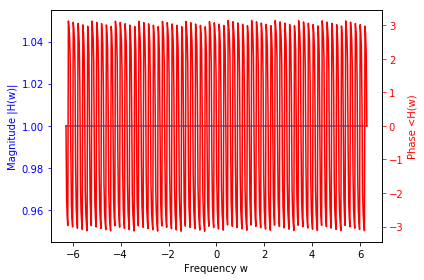

In [342]:
h_u1_s3, w = all_pass_generator(32, 0.63157, axis_samples)
mag_phase_plot(h_u1_s3, w)

#### Unit 1 Filter:

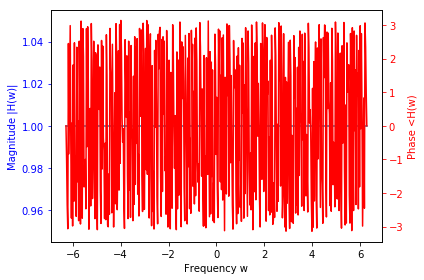

In [343]:
h_u1 = h_u1_s1 * h_u1_s2 * h_u1_s3
mag_phase_plot(h_u1, w)

#### Unit 1 Time response:

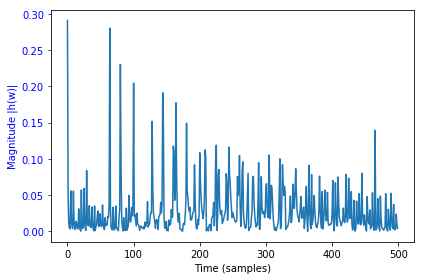

In [344]:
h_t1 = ifft(h_u1)
time_plot(np.abs(h_t1))

### Unit 2

#### Section 1:

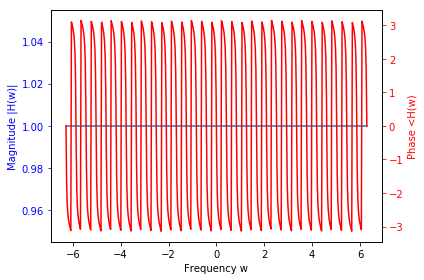

In [345]:
h_u2_s1, w = all_pass_generator(15, 0.7, axis_samples)
mag_phase_plot(h_u2_s1, w)

#### Section 2:

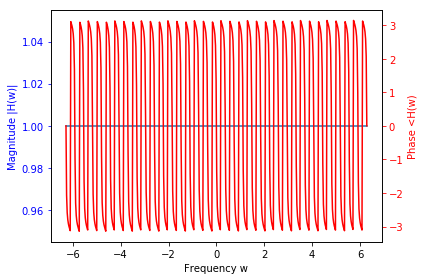

In [346]:
h_u2_s2, w = all_pass_generator(17, 0.77, axis_samples)
mag_phase_plot(h_u2_s2, w)

#### Section 3:

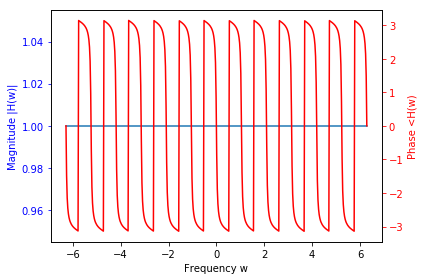

In [347]:
h_u2_s3, w = all_pass_generator(6, 0.847, axis_samples)
mag_phase_plot(h_u2_s3, w)

#### Unit 2 Filter:

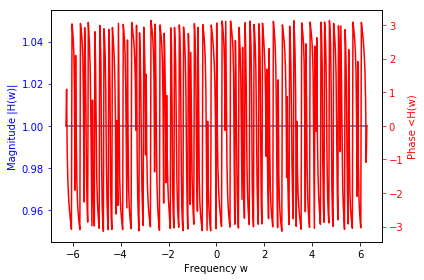

In [348]:
h_u2 = h_u2_s1 * h_u2_s2 * h_u2_s3
mag_phase_plot(h_u2, w)

#### Unit 2 Time response:

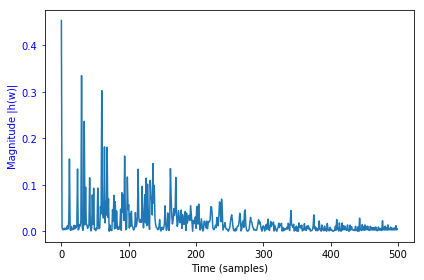

In [349]:
h_t2 = ifft(h_u2)
time_plot(np.abs(h_t2))

## 5.80 c

The responses seem to vary depending on the axis used, but in the above configuration, Unit 1 seems to be very regular compared to Unit 2. This makes Unit 2 the better choice.

### 5.80 d

Delays of prime values will result in periodic signals not being amplified in the same places. This means that the superposition of signals will be out of phase when the delayed unit picks them up. In other words, specific peaks will not be amplified regularly so the peaks will be spaced closer together with lower amplitude than would be if the delays were nonprime.

### 5.80 e

From the graphs of **Unit 1 Filter** and **Unit 2 Filter** we can examine the phase plots. I think it is important to reiterate that the behavior of the plots in highly dependent on the number of samples (the length of the axis) that were used to generate the filter components. That being said, in the current configuration of 250 samples we can see that the Unit 1 Filter seems to have some sinusoidal regularity while Unit 2 Filter seems far less regular.

### 5.80 f

We can see that the results of nonprime numbers for Ds results in a total filter with some periodic regularity.

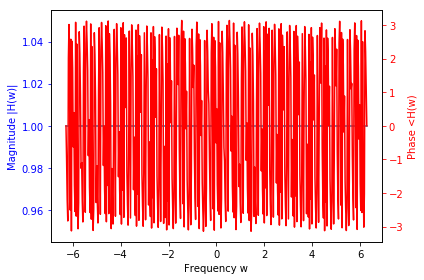

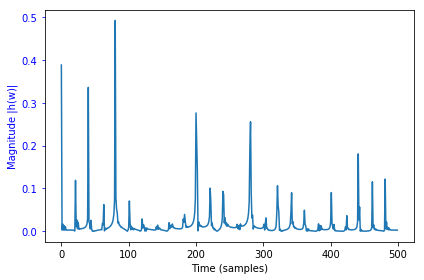

In [353]:
h_p1, w = all_pass_generator(60, 0.847, axis_samples)
h_p2, w = all_pass_generator(40, 0.7, axis_samples)
h_p3, w = all_pass_generator(20, 0.66, axis_samples)

h_p = h_p1*h_p2*h_p3
mag_phase_plot(h_p, w)
time_plot(abs(ifft(h_p)))